# Synthetic Data Fit

In [1]:
from drdmannturb.calibration import CalibrationProblem
from drdmannturb.data_generator import OnePointSpectraDataGenerator
from drdmannturb.shared.parameters import NNParameters, ProblemParameters, LossParameters, PhysicalParameters

import torch
import torch.nn as nn
import numpy as np

device = "cuda" if torch.cuda.is_available() else "cpu" 

# v2: torch.set_default_device('cuda:0')
if torch.cuda.is_available():
    torch.set_default_tensor_type("torch.cuda.FloatTensor")

L = 0.59

Gamma = 3.9
sigma = 3.4

domain = torch.logspace(-1, 2, 20)

In [2]:
pb = CalibrationProblem(
    nn_params = NNParameters(
        activations = [nn.GELU(), nn.GELU()], 
    ),
    prob_params = ProblemParameters(nepochs=5),
    loss_params = LossParameters(),
    phys_params = PhysicalParameters(
        L=L,
        Gamma=Gamma,
        sigma=sigma,
        domain=domain
    ), 
    device=device
)

In [3]:
parameters = pb.parameters
parameters[:3] = [
    np.log(L),
    np.log(Gamma),
    np.log(sigma)
]

pb.parameters = parameters[:len(pb.parameters)]

k1_data_pts = domain
DataPoints = [(k1, 1) for k1 in k1_data_pts]

In [4]:
Data = OnePointSpectraDataGenerator(data_points=DataPoints).Data

In [5]:
pb.eval(k1_data_pts)
pb.calibrate(data=Data)


Calibrating MannNet...
torch.Size([80])
Initial loss:  0.11981262896895295

[Calibration.py -- calibrate]-> Epoch 0

loss  =  0.11981262896895295
loss  =  0.07500263793359174
loss  =  0.06795408782537153
loss  =  0.06225059303629752
loss  =  0.03810237752866618
loss  =  0.038091833472572
loss  =  0.03804565012579943
loss  =  0.03782950231309653
loss  =  0.037769553859451965
loss  =  0.037469542935110504
loss  =  0.03745680917622577
loss  =  0.03735072119969003
loss  =  0.037228168515792595
loss  =  0.037092883494532
loss  =  0.03692584254969724
loss  =  0.036433276839224336
loss  =  0.03634925881199026
loss  =  0.03630361476451398
loss  =  0.036105691019025554
loss  =  0.03523453028583309
loss  =  0.035139561633043395
loss  =  0.03440738932605266
loss  =  0.03384576624364121
loss  =  0.032470073654238214
loss  =  0.03206766752513871
---------------------------------



[Calibration.py -- calibrate]-> Epoch 1

loss  =  0.03206766752513871
loss  =  0.03165586999698288
loss  =  0.0291117

array([-5.14232240e-01,  1.10540770e+00,  9.38367118e-01,  5.58480331e-01,
        2.11023875e-01,  5.52499043e-01, -5.07195354e-01, -2.22948179e-01,
        1.96428141e-03,  1.08880906e-01, -3.20743118e-01, -3.23193194e-01,
        1.07753673e-01, -3.09868747e-01, -4.16740170e-01, -1.08497078e+00,
       -4.94167959e-02,  1.39252544e+00,  7.86424160e-01, -7.42247181e-01,
        6.85271841e-01, -7.73439078e-01, -6.48151907e-01,  7.57676225e-01,
        1.68118860e-01, -5.80718742e-01, -3.13733774e-01, -3.93949055e-01,
       -4.46144253e-01,  8.87769489e-01,  8.23239156e-01, -1.00897098e+00,
        2.17611810e-01,  4.36028576e-01,  1.70164346e-01,  3.70576241e-02,
       -7.41842124e-02,  9.22899115e-03,  3.99037389e-01, -4.58313141e-01,
       -1.02518851e-01, -3.17481464e-01,  3.32495449e-01, -3.15014013e-01,
       -3.73625725e-02, -1.02625763e-01, -1.76347444e-01,  1.41018402e-01,
        4.73446621e-03, -3.48211831e-01,  2.20147571e-01,  1.40275984e-01,
        2.92951128e-01,  

k1.size: torch.Size([20])   self.kF_data_vals: torch.Size([80])


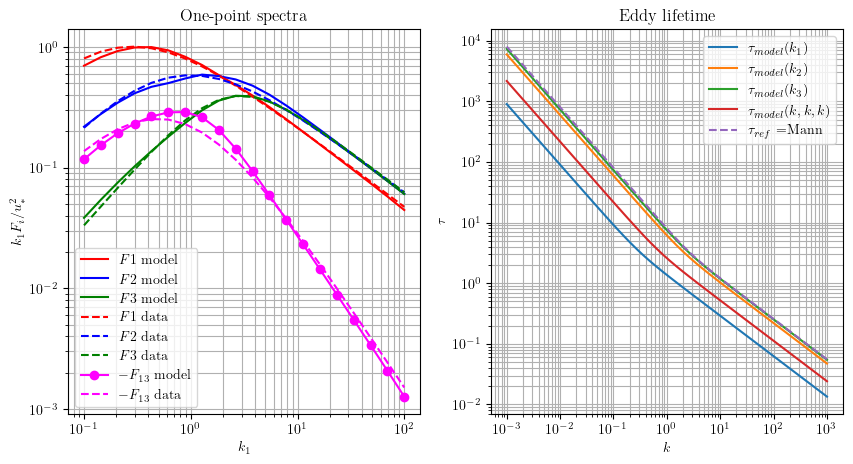

In [6]:
pb.plot(plt_dynamic=False)

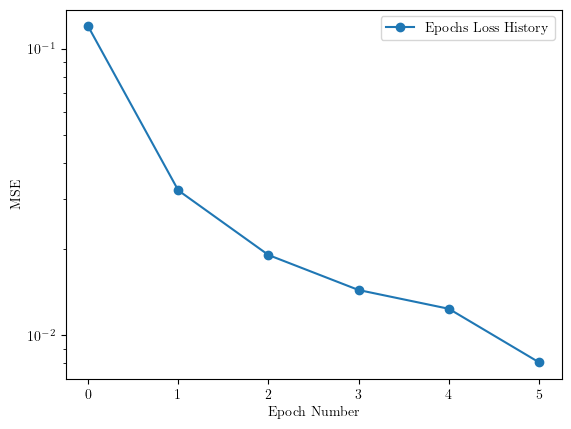

In [7]:
import matplotlib.pyplot as plt

plt.figure()

plt.plot( pb.loss_history_epochs, 'o-', label="Epochs Loss History")
plt.legend()
plt.xlabel("Epoch Number")
plt.ylabel("MSE")
plt.yscale('log')

plt.show()
